In [3]:
library(tidyverse)
library(plyr)
library(ggrepel)

In [4]:
code_dir <- getwd()
tool_dir <- unlist(strsplit(code_dir,"/"))
tool_dir <- head(tool_dir, length(tool_dir)-1)
tool_dir <- paste(c(tool_dir, "tools"), collapse="/")
source(file.path(tool_dir, "pl_functions.R"))
base_dir <- gsub("/plotting_codes", "", code_dir)
base_dir

[1] "/media/pipkin/ROCKET-PRO/CD8_DEV_SC"

In [5]:
exp_name <- "1_IL2RAKO"
analysis_name <- c("0", "all") 

use.path <- file.path(base_dir, '9_Figures', exp_name, 
                      paste(analysis_name, collapse="_"),
                      'volcano_plots')
dir.create(use.path, showWarnings = FALSE, recursive=TRUE)
setwd(use.path)

In [6]:
label.file <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/0_sum/1_IL2RAKO_obs_louvainAvg.csv'
label.df <- read_csv(label.file)

Parsed with column specification:
cols(
  louvain = col_double(),
  n_genes = col_double(),
  percent_mito = col_double(),
  n_counts = col_double(),
  dpt_pseudotime = col_double(),
  counts_per_gene = col_double(),
  louvain_new_label = col_character()
)



## 2. In cluster: Arm v.s. Cl13

In [7]:
de.dir <- '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/2_DE/perCluster_KO_vs_WT'

Parsed with column specification:
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)

The following `from` values were not present in `x`: yes_TRUE_G1, yes_TRUE_G2



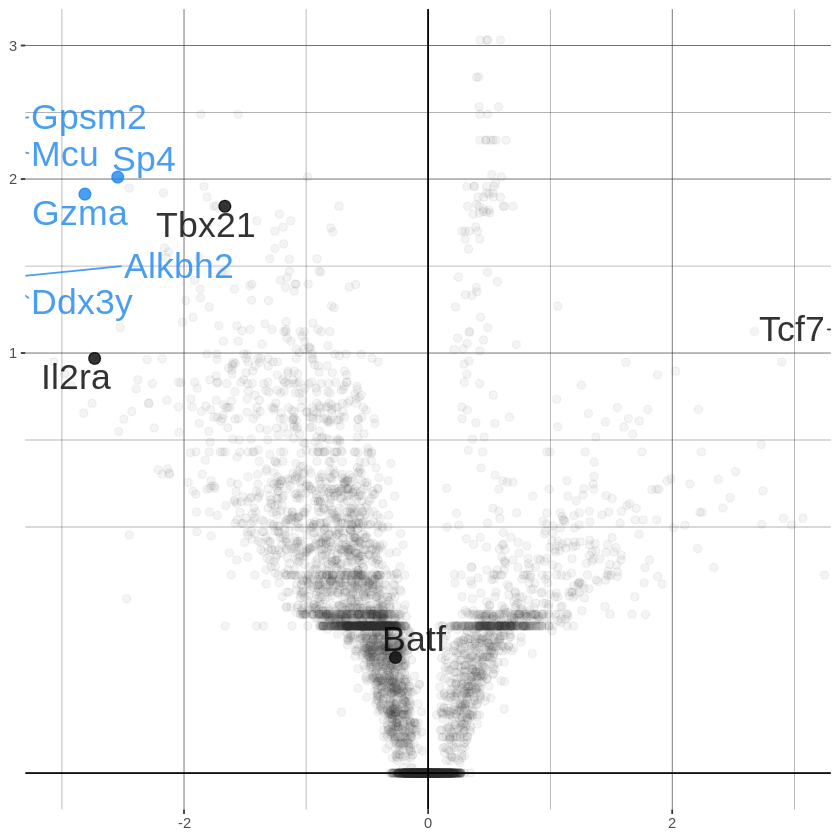

In [11]:
cluster <- c('P2')
cluster_oldname <- cvt_names(cluster, label.df$louvain_new_label, label.df$louvain)
cluster_oldname <- as.character(cluster_oldname)

cp_oldnames <- c("CD25KO", "CD25WT")
cp <- c("KO", "WT")

###----- Setup
outname.base <- paste(cluster, cp[1], "vs", cp[2], sep="_")
use.genes <- c("Tbx21", "Il2ra", "Batf", "Tox", "Bach2", "Tcf7", "Tox","Batf3")
log2fc.c <- 2.5
nlog10p.c <- 1.3

###----- Plot
# Read input
louvain.de.file <- paste(cp_oldnames[1], "vs", cp_oldnames[2], "differential.csv", sep="_")
louvain.de.file <- file.path(de.dir, cluster_oldname,file.path(cp_oldnames[1], louvain.de.file))
de.df <- read_csv(louvain.de.file)
# Filter out low expression & convert df for plotting
de.df <- de.df %>% 
  mutate(max_expr = pmax(pull(de.df, cp_oldnames[1]), pull(de.df, cp_oldnames[2]))) %>% filter(max_expr > 0.15) %>% 
  drop_na() %>% select(one_of('gene_names', 't-test_logfc', 't-test_padj'))
colnames(de.df) <- c("gene_name", "log2fc", "padj")
de.df$nlog10pval <- -log10(de.df$padj)
# Plot
vol_plot <- volcano_plot(de.df, use.genes , log2fc.c, nlog10p.c, c(-3,3),3 ) # With label
ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')
vol_plot
vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')

In [13]:
source(file.path(tool_dir, "pl_functions.R"))

In [18]:
for (i in c(2:9)) {
    cluster <- c(paste("P", as.character(i), sep=""))
    cluster_oldname <- cvt_names(cluster, label.df$louvain_new_label, label.df$louvain)
    cluster_oldname <- as.character(cluster_oldname)

    cp_oldnames <- c("CD25KO", "CD25WT")
    cp <- c("KO", "WT")

    ###----- Setup
    outname.base <- paste(cluster, cp[1], "vs", cp[2], sep="_")
    use.genes <- c("Tbx21", "Il2ra", "Batf", "Tox", "Bach2", "Tcf7", "Tox","Batf3")
    log2fc.c <- 2.5
    nlog10p.c <- 1.3

    ###----- Plot
    # Read input
    louvain.de.file <- paste(cp_oldnames[1], "vs", cp_oldnames[2], "differential.csv", sep="_")
    louvain.de.file <- file.path(de.dir, cluster_oldname,file.path(cp_oldnames[1], louvain.de.file))
    de.df <- read_csv(louvain.de.file)
    # Filter out low expression & convert df for plotting
    de.df <- de.df %>% filter( ! gene_names %in% c("Xist", "Tsix", "Eif2s3y", "Ddx3y"))  
    de.df <- de.df %>%
      mutate(max_expr = pmax(pull(de.df, cp_oldnames[1]), pull(de.df, cp_oldnames[2]))) %>% 
      filter(max_expr > 0.15) %>% 
      drop_na() %>% select(one_of('gene_names', 't-test_logfc', 't-test_padj'))
    colnames(de.df) <- c("gene_name", "log2fc", "padj")
    de.df$nlog10pval <- -log10(de.df$padj)
    # Plot
    vol_plot <- volcano_plot(de.df, use.genes , log2fc.c, nlog10p.c, c(-3,3), 3) # With label
    ggsave(paste(outname.base, ".png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')
    vol_plot
    vol_plot <- vol_plot + theme(axis.text.x=element_blank(), axis.text.y=element_blank()) # Without label
    ggsave(paste(outname.base, "_nolabel.png", sep=""), vol_plot, device='png', width=10, height=10, units='cm')
}

Parsed with column specification:
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_double()
)

The following `from` values were not present in `x`: yes_TRUE_G1, yes_TRUE_G2, no_TRUE_G1

Parsed with column specification:
cols(
  gene_names = col_character(),
  CD25KO = col_double(),
  CD25WT = col_double(),
  wilcoxon_logfc = col_double(),
  wilcoxon_padj = col_double(),
  wilcoxon_score = col_double(),
  `t-test_logfc` = col_double(),
  `t-test_padj` = col_double(),
  `t-test_score` = col_double(),
  `t-test_overestim_var_logfc` = col_double(),
  `t-test_overestim_var_padj` = col_double(),
  `t-test_overestim_var_score` = col_d

ERROR: Error: '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/1_IL2RAKO/1_Scanpy/0-all_Scanpy_out/2_DE/perCluster_KO_vs_WT/P8/CD25KO/CD25KO_vs_CD25WT_differential.csv' does not exist.
